<a href="https://colab.research.google.com/github/caraherrerapor/Asteroids_game/blob/master/red_neuronal_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

In [2]:
N= 1000
gaussian_quantiles = make_gaussian_quantiles(mean=None,
                        cov=0.1,
                        n_samples=N,
                        n_features = 2,
                        n_classes = 2,
                        shuffle = True,
                        random_state=None)
x,y = gaussian_quantiles

In [3]:
y = y[:,np.newaxis]

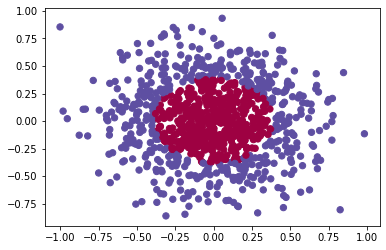

In [4]:
plt.scatter(x[:,0],x[:,1],c=y[:,0],s=40,cmap=plt.cm.Spectral)

funciones de activacion

In [5]:
def sigmoid(x,derivate=False):
  if derivate:
    return np.exp(-x)/((np.exp(-x)+1)**2)
  else:
    return 1/(1+np.exp(-x))
def relu(x,derivate=False):
  if derivate:
    x[x<=0]=0
    x[x>0]=1
    return x
  else:
    return np.maximum(0,x)

Error

In [6]:
def mse(y,y_hat,derivate = False):
  if(derivate):
    return (y_hat-y)
  else:
    return np.mean((y_hat-y)**2)

In [7]:
def initialize_parameters(layer_dim):
  parameters = {}
  L = len(layer_dim)
  #crear pesos aleaotrios
  for l in range(0,L-1):
    parameters['W'+str(l+1)]=(np.random.rand(layer_dim[l],layer_dim[l+1])*2)-1
    parameters['b'+str(l+1)]=(np.random.rand(1,layer_dim[l+1])*2)-1
  return parameters


In [8]:
layer_dim = [2,4,8,1]
params = initialize_parameters(layer_dim)
params


{'W1': array([[-0.63569021,  0.45578828,  0.06916628, -0.41899964],
        [-0.85662762, -0.05916274, -0.29243825, -0.57742879]]),
 'W2': array([[ 9.82444594e-01,  6.90663374e-01, -4.06626047e-01,
          8.91999743e-01,  2.68072499e-01,  3.67577431e-01,
          7.28384896e-01,  9.35869305e-01],
        [ 2.64083127e-01,  4.74503496e-02,  8.50138741e-01,
         -4.31673310e-01, -9.23563735e-01, -7.64735903e-02,
         -3.47520060e-02, -8.13969061e-01],
        [-6.62148419e-01, -5.28305469e-01,  1.78794546e-01,
         -7.56568941e-01, -9.34626031e-04, -5.01625438e-01,
          9.77246189e-01, -7.65612880e-01],
        [-4.89619860e-01,  2.48578581e-01, -9.29013588e-01,
          1.28094075e-01,  4.76949754e-01,  7.80029108e-01,
         -1.97541990e-02, -3.34385590e-01]]),
 'W3': array([[-0.31505891],
        [-0.38588117],
        [ 0.81932897],
        [-0.61414458],
        [ 0.40547365],
        [-0.50729743],
        [-0.08578664],
        [ 0.33311542]]),
 'b1': array

In [9]:
params['W1'].shape

(2, 4)

In [10]:
x.shape

(1000, 2)

In [11]:
np.matmul(x,params['W1']).shape

(1000, 4)

In [12]:
x@params['W1']

array([[-0.21720655,  0.31000827,  0.11198661, -0.14023298],
       [ 0.02886585, -0.05785719, -0.02442303,  0.01831963],
       [-0.07770732,  0.0833602 ,  0.02428717, -0.05069323],
       ...,
       [-0.23076634,  0.18738035,  0.03766325, -0.15168716],
       [-0.69971677,  0.06902505, -0.17166319, -0.4694282 ],
       [ 0.16499392, -0.05966884,  0.0156268 ,  0.10986655]])

In [13]:
def train(x_data,lr,params,training = True):



  params['A0']=x_data
  params['z1']=np.matmul(params['A0'],params['W1']+params['b1'])
  params['A1']=relu(params['z1'])

  params['z2']=np.matmul(params['A1'],params['W2']+params['b2'])
  params['A2']=relu(params['z2'])

  params['z3']=np.matmul(params['A2'],params['W3']+params['b3'])
  params['A3']=sigmoid(params['z3'])

  output = params['A3']
  if training:
  #back propagation

    params['dz3'] = mse(y,output,True)*sigmoid(params['A3'],True)
    params['dW3'] = np.matmul(params['A2'].T,params['dz3'])

    params['dz2'] = np.matmul(params['dz3'],params['W3'].T)*relu(params['A2'],True)
    params['dW2'] = np.matmul(params['A1'].T,params['dz2'])

    params['dz1'] = np.matmul(params['dz2'],params['W2'].T)*relu(params['A1'],True)
    params['dW1'] = np.matmul(params['A0'].T,params['dz1'])

    ##gradient decent

    params['W3'] = params['W3']-params['dW3']*lr
    params['b3'] = params['b3'] -(np.mean(params['dW3'],axis = 0,keepdims=True))*lr

    params['W2'] = params['W2']-params['dW2']*lr
    params['b2'] = params['b2'] -(np.mean(params['dW2'],axis = 0,keepdims=True))*lr

    params['W1'] = params['W1']-params['dW1']*lr
    params['b1'] = params['b1'] -(np.mean(params['dW1'],axis = 0,keepdims=True))*lr

    return output

In [14]:
output.shape

(1000, 1)

In [48]:
layer_dim = [2,4,8,1]
params = initialize_parameters(layer_dim)
errors = []

for _ in range(60000):
  output = train(x,0.00001,params)
  if _ %25 ==0:
    print(mse(y,output))
    errors.append(mse(y,output))



0.36871946027520447
0.364888070672142
0.3609842835656533
0.35702219669564894
0.353104434068121
0.3494110129553849
0.34594710677421886
0.3427032038374718
0.33955546780337387
0.3364883399171128
0.33346392015222504
0.33047975943511393
0.3275279906598771
0.3246095188679386
0.3217239860038664
0.3188824698633961
0.31612747047973483
0.31348988619053453
0.31099789497180264
0.30863633050127176
0.30636960346730097
0.3041896305778816
0.3021090186378424
0.3001119035411831
0.2981809235382607
0.2963154916593633
0.2944929903941675
0.29270991945573815
0.2909533790270565
0.28923842459330534
0.28756667526729246
0.28593164402216026
0.2843352546497547
0.28277531308686527
0.2812548229247313
0.2797754508835148
0.2783344638626533
0.2769339099832758
0.2755684448499101
0.27423858545267954
0.27294162688743556
0.2716807884722784
0.270457135443839
0.2692766635028086
0.26813682181663673
0.2670347886099659
0.26596947228190165
0.26494486299598485
0.2639574698401602
0.2630067342298032
0.2620898124202671
0.26120651089

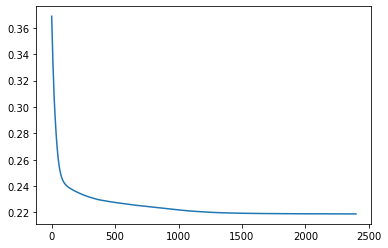

In [50]:
plt.plot(errors)

In [60]:
data_test = (np.random.rand(1000,2)*2)-1
Y = train(data_test,0.0001,params,training=False)

In [59]:
Y = np.where(Y >= 0.5,1,0)

TypeError: ignored